In [62]:

import pandas as pd

# Load the dataset
data = pd.read_csv("/content/Electricity BILL.csv")

# Display basic info and check for missing values
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Separate numerical and categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Building_Type                1250 non-null   object 
 1   Construction_Year            1250 non-null   int64  
 2   Number_of_Floors             1250 non-null   int64  
 3   Energy_Consumption_Per_SqM   1250 non-null   float64
 4   Water_Usage_Per_Building     1250 non-null   float64
 5   Waste_Recycled_Percentage    1250 non-null   float64
 6   Occupancy_Rate               1250 non-null   float64
 7   Indoor_Air_Quality           1250 non-null   float64
 8   Smart_Devices_Count          1250 non-null   int64  
 9   Green_Certified              1250 non-null   int64  
 10  Maintenance_Resolution_Time  1250 non-null   float64
 11  Building_Status              1250 non-null   object 
 12  Maintenance_Priority         1250 non-null   object 
 13  Energy_Per_SqM    

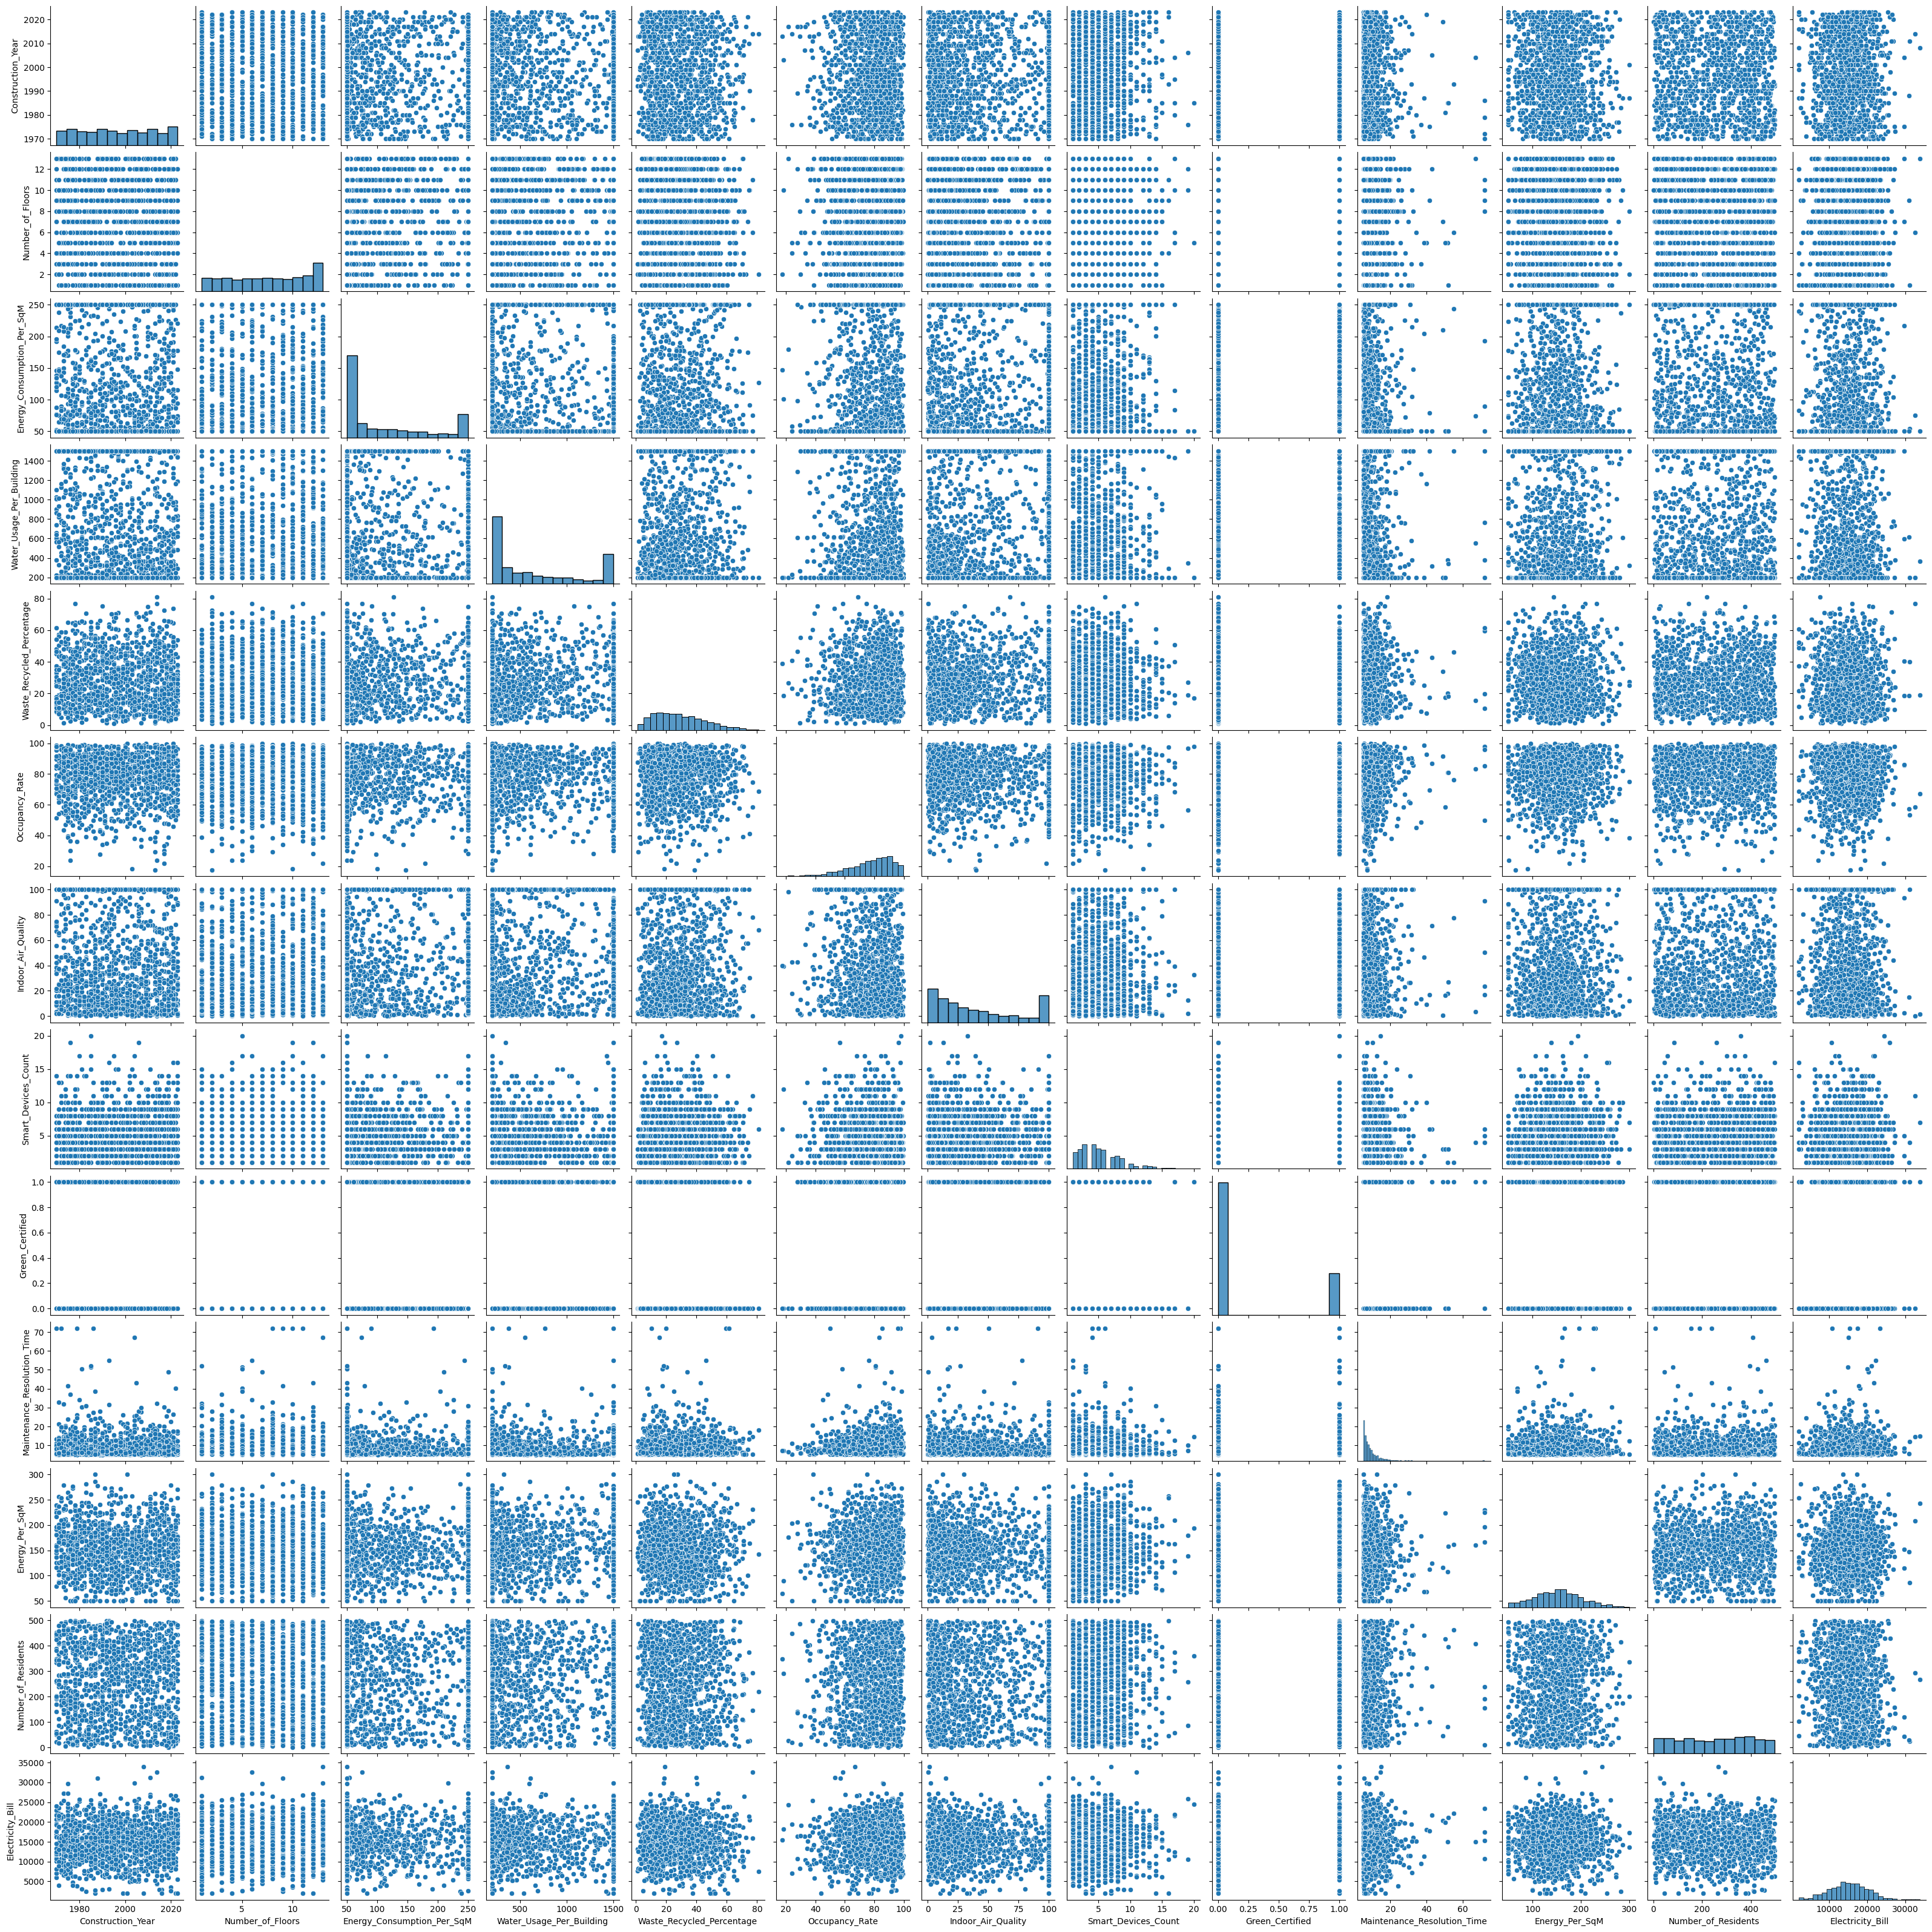

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to see relationships between numerical features and the target variable
sns.pairplot(data[numerical_cols])
plt.show()

**Part A**

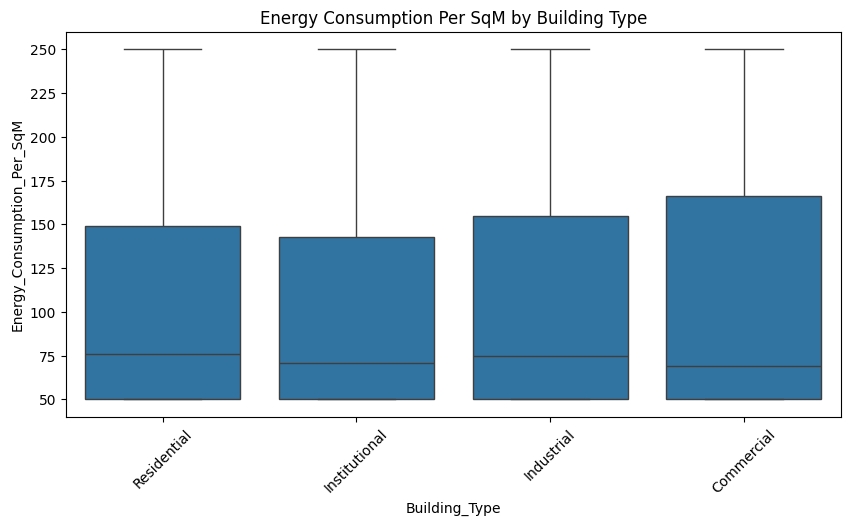

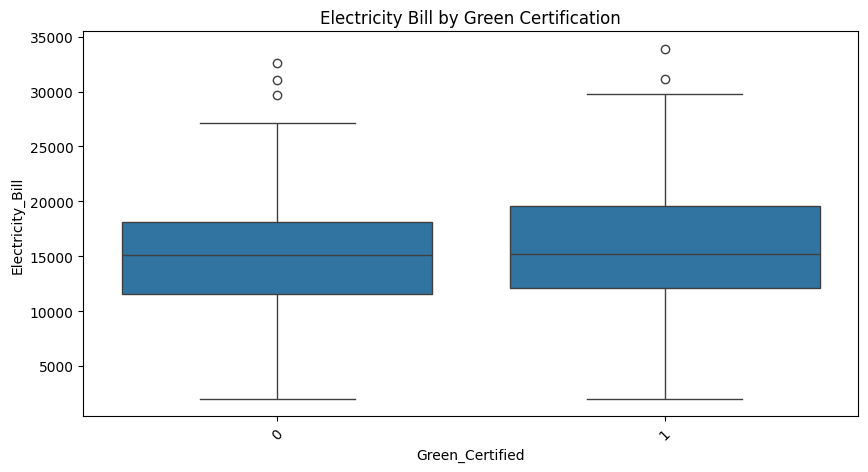

In [64]:
# Box plot of Energy_Consumption_Per_SqM by Building_Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Building_Type', y='Energy_Consumption_Per_SqM', data=data)
plt.title('Energy Consumption Per SqM by Building Type')
plt.xticks(rotation=45)
plt.show()

# Box plot of Electricity_Bill by Green_Certified
plt.figure(figsize=(10, 5))
sns.boxplot(x='Green_Certified', y='Electricity_Bill', data=data)
plt.title('Electricity Bill by Green Certification')
plt.xticks(rotation=45)
plt.show()



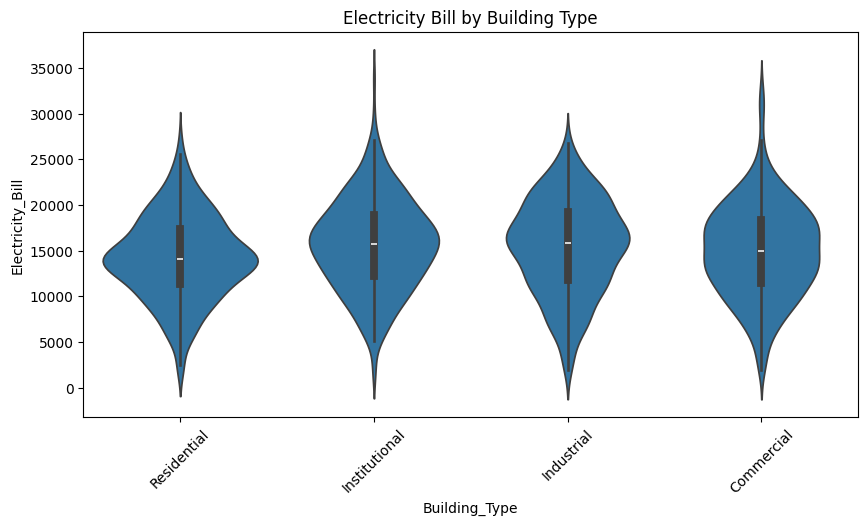

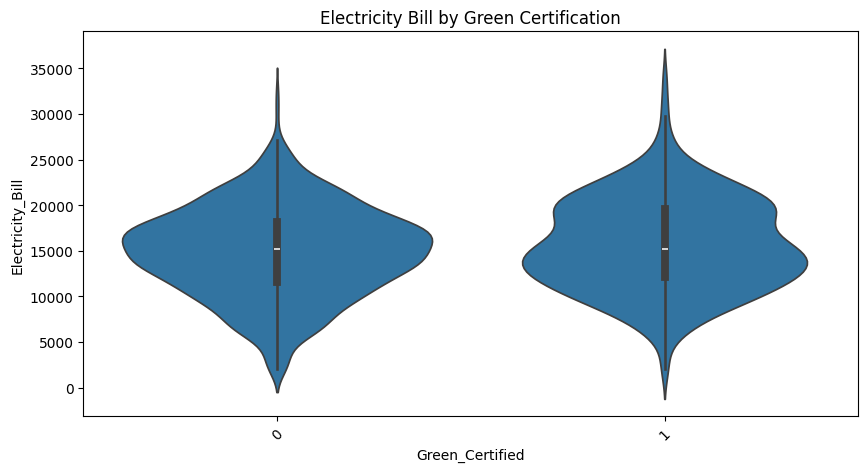

In [65]:
# Violin plot of Electricity_Bill by Building_Type
plt.figure(figsize=(10, 5))
sns.violinplot(x='Building_Type', y='Electricity_Bill', data=data)
plt.title('Electricity Bill by Building Type')
plt.xticks(rotation=45)
plt.show()

# Violin plot of Electricity_Bill by Green_Certified
plt.figure(figsize=(10, 5))
sns.violinplot(x='Green_Certified', y='Electricity_Bill', data=data)
plt.title('Electricity Bill by Green Certification')
plt.xticks(rotation=45)
plt.show()


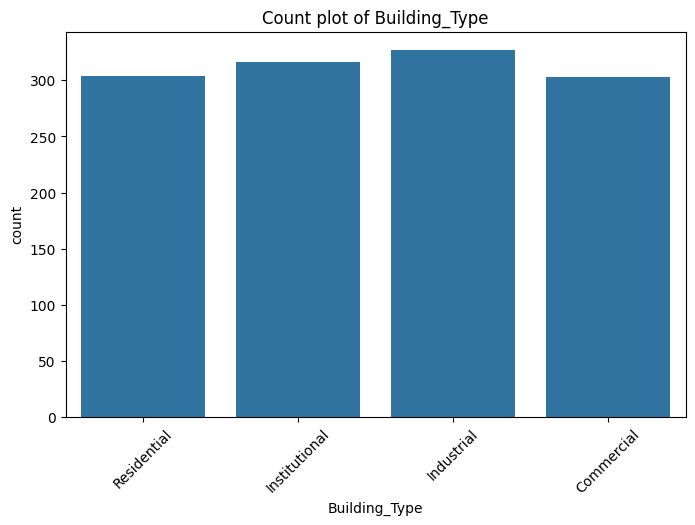

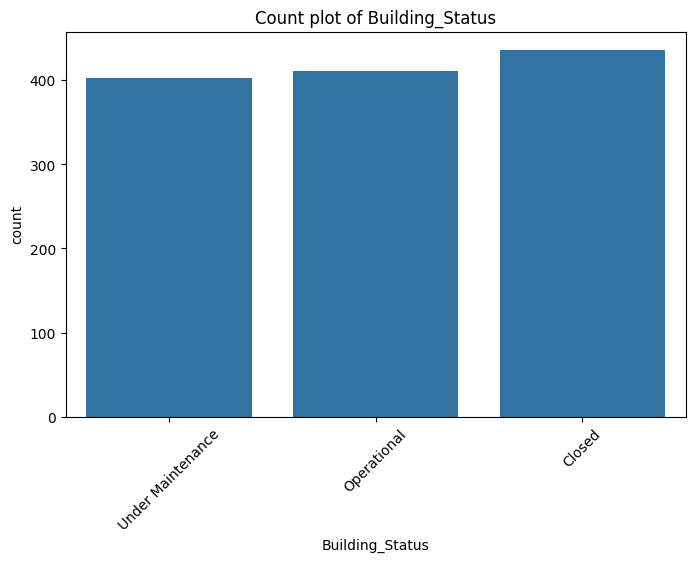

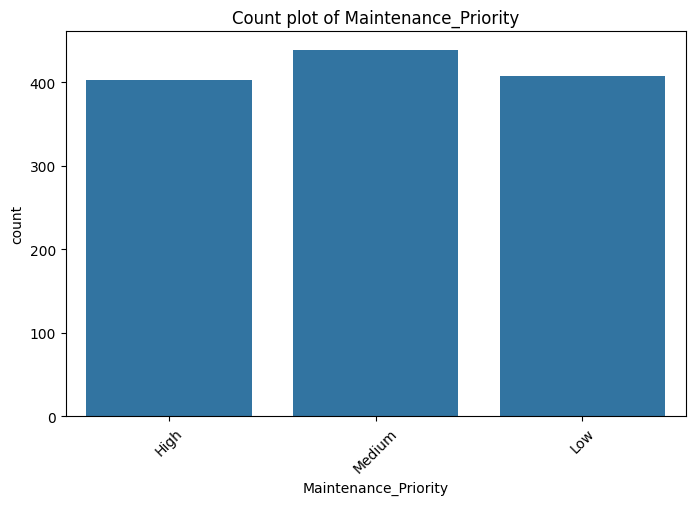

In [66]:
# Count plots to see the distribution of categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=data)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


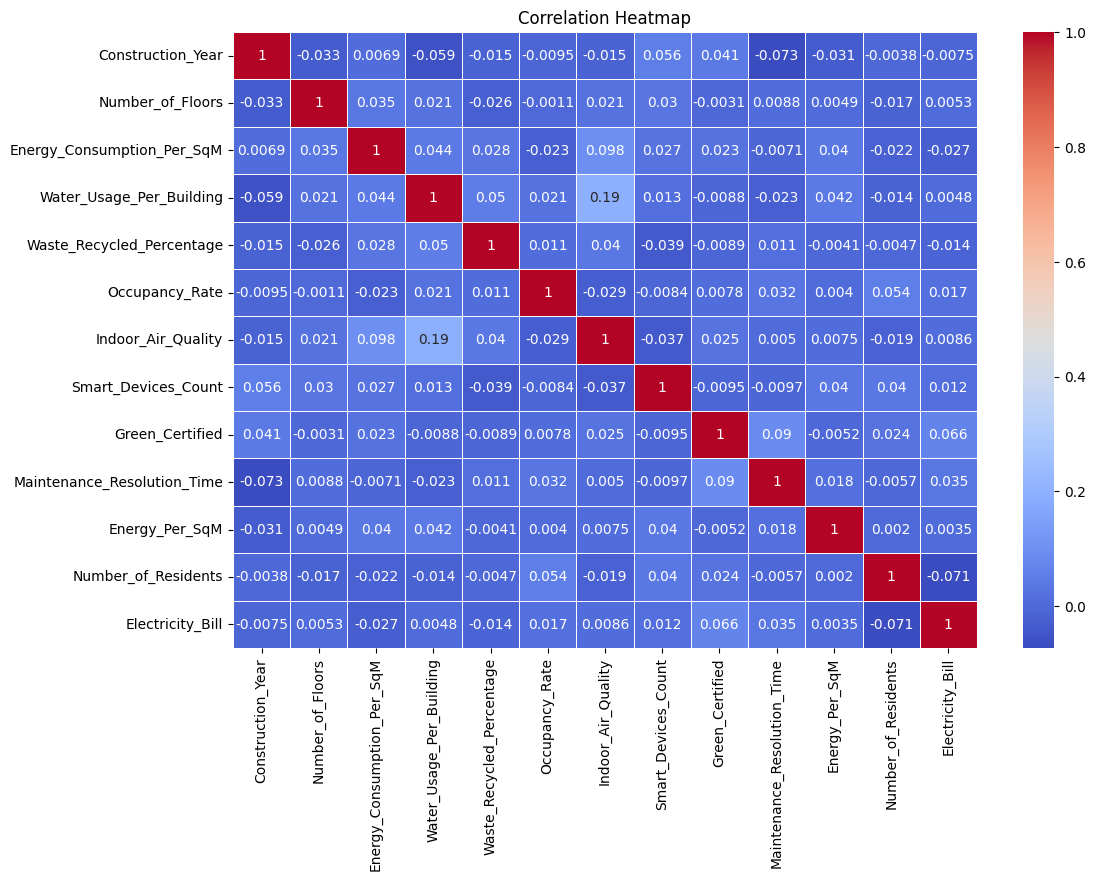

In [67]:
# Correlation heatmap to visualize correlations between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [68]:
!pip install umap-learn

**Part B**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


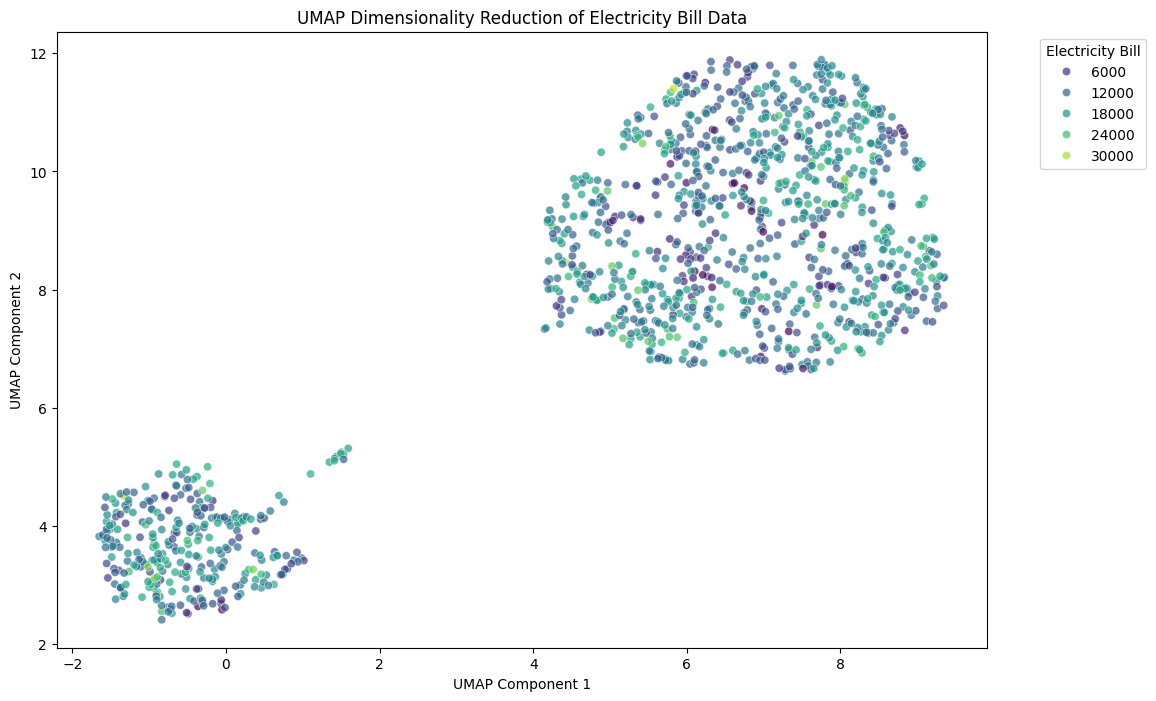

In [69]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap


# Identify numerical columns for UMAP
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_cols])

# Apply UMAP to reduce dimensions to 2
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(scaled_data)

# Convert the embedding to a DataFrame
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])

# Add target variable (Electricity_Bill) for coloring the scatter plot
umap_df['Electricity_Bill'] = data['Electricity_Bill']

# Scatter plot of UMAP results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Electricity_Bill', palette='viridis', data=umap_df, alpha=0.7)
plt.title('UMAP Dimensionality Reduction of Electricity Bill Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Electricity Bill', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



**Part C**



In [70]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Step 1: Data Preprocessing
data = pd.read_csv("/content/Electricity BILL.csv")
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns



# Encode categorical features using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 42)

X_train = train_data.drop(columns=['Electricity_Bill'])
y_train = train_data['Electricity_Bill']
X_test = test_data.drop(columns=['Electricity_Bill'])
y_test = test_data['Electricity_Bill']

# Scale numerical features using StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Step 2: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 3: Model Evaluation

# Function to calculate adjusted R² score
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Evaluation metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2_score(r2_train, X_train.shape[0], X_train.shape[1])

# Evaluation metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2_score(r2_test, X_test.shape[0], X_test.shape[1])

# Display the results
print(f"Train Metrics:")
print(f"MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R²: {r2_train:.4f}, Adjusted R²: {adj_r2_train:.4f}")

print(f"Test Metrics:")
print(f"MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, R²: {r2_test:.4f}, Adjusted R²: {adj_r2_test:.4f}")


Train Metrics:
MSE: 24475013.1685, RMSE: 4947.2228, MAE: 4006.3285, R²: 0.0139, Adjusted R²: -0.0011
Test Metrics:
MSE: 24278016.1557, RMSE: 4927.2727, MAE: 3842.4093, R²: 0.0000, Adjusted R²: -0.0641


**Part D :-**

In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Data Preprocessing
data = pd.read_csv("/content/Electricity BILL.csv")

# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Encode categorical features using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data.loc[:, col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target variable
X = data.drop(columns=['Electricity_Bill'])
y = data['Electricity_Bill']

# Step 2: Feature Selection using Recursive Feature Elimination (RFE)

# Initialize Linear Regression model
model = LinearRegression()

# Apply RFE to select the top 3 features
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features.tolist()}")

# Use only the selected features for training
X_selected = X[selected_features]

# Split the data into training and test sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train the Linear Regression Model with selected features
model.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 4: Model Evaluation

# Function to calculate adjusted R² score
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Evaluation metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2_score(r2_train, X_train.shape[0], X_train.shape[1])

# Evaluation metrics for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2_score(r2_test, X_test.shape[0], X_test.shape[1])

# Display the results
print(f"Train Metrics with Selected Features:")
print(f"MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R²: {r2_train:.4f}, Adjusted R²: {adj_r2_train:.4f}")

print(f"Test Metrics with Selected Features:")
print(f"MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, R²: {r2_test:.4f}, Adjusted R²: {adj_r2_test:.4f}")




Selected Features: ['Building_Type', 'Green_Certified', 'Building_Status']
Train Metrics with Selected Features:
MSE: 24673540.3115, RMSE: 4967.2468, MAE: 4006.7840, R²: 0.0059, Adjusted R²: 0.0029
Test Metrics with Selected Features:
MSE: 24181190.6472, RMSE: 4917.4374, MAE: 3825.6516, R²: 0.0040, Adjusted R²: -0.0081


**Part E:-**

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv('/content/Electricity BILL.csv')

# Handle missing values by filling numerical columns with median
data.fillna(data.median(numeric_only=True), inplace=True)

# Define the features and target variable
features = ['Building_Type', 'Construction_Year', 'Number_of_Floors', 'Energy_Consumption_Per_SqM',
            'Water_Usage_Per_Building', 'Waste_Recycled_Percentage', 'Occupancy_Rate',
            'Indoor_Air_Quality', 'Smart_Devices_Count', 'Green_Certified',
            'Maintenance_Resolution_Time', 'Building_Status', 'Maintenance_Priority',
            'Energy_Per_SqM', 'Number_of_Residents']
target = 'Electricity_Bill'

X = data[features]
y = data[target]

# Separate categorical and numerical features
categorical_features = ['Building_Type', 'Building_Status', 'Maintenance_Priority']
numerical_features = list(set(features) - set(categorical_features))

# Apply One-Hot Encoding to categorical features
# Using ColumnTransformer to apply OneHotEncoder only to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can change alpha for tuning

# Train the model
ridge_model.fit(X_train, y_train)

# Predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

mse_train, rmse_train, mae_train, r2_train = evaluate_model(y_train, y_train_pred)
mse_test, rmse_test, mae_test, r2_test = evaluate_model(y_test, y_test_pred)

# Adjusted R² score function
def adjusted_r2_score(X, y, y_pred):
    n = X.shape[0]  # number of samples
    p = X.shape[1]  # number of features
    r2 = r2_score(y, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

adj_r2_train = adjusted_r2_score(X_train, y_train, y_train_pred)
adj_r2_test = adjusted_r2_score(X_test, y_test, y_test_pred)

# Print the evaluation metrics for training and test sets
print(f"Training MSE (Ridge with One-Hot Encoding): {mse_train:.2f}")
print(f"Training RMSE (Ridge with One-Hot Encoding): {rmse_train:.2f}")
print(f"Training MAE (Ridge with One-Hot Encoding): {mae_train:.2f}")
print(f"Training R² Score (Ridge with One-Hot Encoding): {r2_train:.2f}")
print(f"Training Adjusted R² Score (Ridge with One-Hot Encoding): {adj_r2_train:.2f}")

print(f"Test MSE (Ridge with One-Hot Encoding): {mse_test:.2f}")
print(f"Test RMSE (Ridge with One-Hot Encoding): {rmse_test:.2f}")
print(f"Test MAE (Ridge with One-Hot Encoding): {mae_test:.2f}")
print(f"Test R² Score (Ridge with One-Hot Encoding): {r2_test:.2f}")
print(f"Test Adjusted R² Score (Ridge with One-Hot Encoding): {adj_r2_test:.2f}")


Training MSE (Ridge with One-Hot Encoding): 24188934.34
Training RMSE (Ridge with One-Hot Encoding): 4918.22
Training MAE (Ridge with One-Hot Encoding): 3976.74
Training R² Score (Ridge with One-Hot Encoding): 0.03
Training Adjusted R² Score (Ridge with One-Hot Encoding): 0.01
Test MSE (Ridge with One-Hot Encoding): 24128288.50
Test RMSE (Ridge with One-Hot Encoding): 4912.06
Test MAE (Ridge with One-Hot Encoding): 3797.51
Test R² Score (Ridge with One-Hot Encoding): 0.01
Test Adjusted R² Score (Ridge with One-Hot Encoding): -0.08


**Part F:-**

In [73]:
# Necessary imports for ICA
from sklearn.decomposition import FastICA

# Function to perform ICA and evaluate Ridge Regression
def ica_and_ridge(X_train, X_test, y_train, y_test, n_components):
    # Perform ICA
    ica = FastICA(n_components=n_components, random_state=42)
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)

    # Ridge Regression model
    ridge = Ridge(alpha=1.0)  # You can adjust alpha as needed

    # Train the model
    ridge.fit(X_train_ica, y_train)

    # Predictions and metrics for Ridge Regression
    y_train_pred = ridge.predict(X_train_ica)
    y_test_pred = ridge.predict(X_test_ica)

    # Calculate metrics for Ridge Regression
    train_mse, train_rmse, train_mae, train_r2 = calculate_metrics(y_train, y_train_pred)
    train_adjusted_r2 = 1 - (1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train_ica.shape[1] - 1)

    test_mse, test_rmse, test_mae, test_r2 = calculate_metrics(y_test, y_test_pred)
    test_adjusted_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_test_ica.shape[1] - 1)

    # Print results
    print(f"\nResults for {n_components} ICA components:")
    print(f"Train Metrics: MSE: {train_mse}, RMSE: {train_rmse}, MAE: {train_mae}, R²: {train_r2}, Adjusted R²: {train_adjusted_r2}")
    print(f"Test Metrics: MSE: {test_mse}, RMSE: {test_rmse}, MAE: {test_mae}, R²: {test_r2}, Adjusted R²: {test_adjusted_r2}")

# Apply One-Hot Encoding and scaling from previous steps
# Assuming X_train, X_test, y_train, and y_test are already defined as in the previous code

# Perform ICA and Ridge Regression for different components
for n in [4, 5, 6, 8]:
    ica_and_ridge(X_train, X_test, y_train, y_test, n_components=n)



Results for 4 ICA components:
Train Metrics: MSE: 24691011.16422197, RMSE: 4969.005047715485, MAE: 4013.643764769286, R²: 0.00522014517346403, Adjusted R²: 0.0012210301791865108
Test Metrics: MSE: 24445531.025383353, RMSE: 4944.242209417269, MAE: 3852.445374277321, R²: -0.006862255826050934, Adjusted R²: -0.023300823268108894

Results for 5 ICA components:
Train Metrics: MSE: 24665146.333945222, RMSE: 4966.401749148494, MAE: 4013.1603260868096, R²: 0.006262217202701148, Adjusted R²: 0.001263536202714688
Test Metrics: MSE: 24499296.61486067, RMSE: 4949.676415167022, MAE: 3850.986633321956, R²: -0.00907675231830285, Adjusted R²: -0.029754554619907392

Results for 6 ICA components:
Train Metrics: MSE: 24663782.317534074, RMSE: 4966.2644228367535, MAE: 4013.2169606307066, R²: 0.006317172264623805, Adjusted R²: 0.0003130464172801384
Test Metrics: MSE: 24473480.235595714, RMSE: 4947.06784222692, MAE: 3847.9901113702945, R²: -0.008013427580665367, Adjusted R²: -0.03290264801475584

Results f

**Part G:-**

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv('/content/Electricity BILL.csv')

# Handle missing values by filling numerical columns with median
data.fillna(data.median(numeric_only=True), inplace=True)

# Define the features and target variable
features = ['Building_Type', 'Construction_Year', 'Number_of_Floors', 'Energy_Consumption_Per_SqM',
            'Water_Usage_Per_Building', 'Waste_Recycled_Percentage', 'Occupancy_Rate',
            'Indoor_Air_Quality', 'Smart_Devices_Count', 'Green_Certified',
            'Maintenance_Resolution_Time', 'Building_Status', 'Maintenance_Priority',
            'Energy_Per_SqM', 'Number_of_Residents']
target = 'Electricity_Bill'

X = data[features]
y = data[target]

# Separate categorical and numerical features
categorical_features = ['Building_Type', 'Building_Status', 'Maintenance_Priority']
numerical_features = list(set(features) - set(categorical_features))

# Apply One-Hot Encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Adjusted R² score function
def adjusted_r2_score(X, y, y_pred):
    n = X.shape[0]
    p = X.shape[1]
    r2 = r2_score(y, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Try different values of alpha (mixing parameter)
alpha_values = [0.1, 0.5, 1.0, 5.0, 10.0]

for alpha in alpha_values:
    print(f"\nElasticNet with alpha = {alpha}")

    # Initialize ElasticNet model with given alpha
    elastic_net = ElasticNet(alpha=alpha, random_state=42)

    # Train the model
    elastic_net.fit(X_train, y_train)

    # Make predictions on test set
    y_test_pred = elastic_net.predict(X_test)

    # Evaluate the model on test data
    mse_test, rmse_test, mae_test, r2_test = evaluate_model(y_test, y_test_pred)
    adj_r2_test = adjusted_r2_score(X_test, y_test, y_test_pred)

    # Print the evaluation metrics
    print(f"Test MSE: {mse_test:.2f}")
    print(f"Test RMSE: {rmse_test:.2f}")
    print(f"Test MAE: {mae_test:.2f}")
    print(f"Test R² Score: {r2_test:.2f}")
    print(f"Test Adjusted R² Score: {adj_r2_test:.2f}")



ElasticNet with alpha = 0.1
Test MSE: 24073398.99
Test RMSE: 4906.47
Test MAE: 3797.97
Test R² Score: 0.01
Test Adjusted R² Score: -0.07

ElasticNet with alpha = 0.5
Test MSE: 24057112.11
Test RMSE: 4904.81
Test MAE: 3803.69
Test R² Score: 0.01
Test Adjusted R² Score: -0.07

ElasticNet with alpha = 1.0
Test MSE: 24091497.90
Test RMSE: 4908.31
Test MAE: 3810.13
Test R² Score: 0.01
Test Adjusted R² Score: -0.07

ElasticNet with alpha = 5.0
Test MSE: 24233303.98
Test RMSE: 4922.73
Test MAE: 3828.87
Test R² Score: 0.00
Test Adjusted R² Score: -0.08

ElasticNet with alpha = 10.0
Test MSE: 24285856.88
Test RMSE: 4928.07
Test MAE: 3834.82
Test R² Score: -0.00
Test Adjusted R² Score: -0.08


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv('/content/Electricity BILL.csv')

# Handle missing values by filling numerical columns with median
data.fillna(data.median(numeric_only=True), inplace=True)

# Define the features and target variable
features = ['Building_Type', 'Construction_Year', 'Number_of_Floors', 'Energy_Consumption_Per_SqM',
            'Water_Usage_Per_Building', 'Waste_Recycled_Percentage', 'Occupancy_Rate',
            'Indoor_Air_Quality', 'Smart_Devices_Count', 'Green_Certified',
            'Maintenance_Resolution_Time', 'Building_Status', 'Maintenance_Priority',
            'Energy_Per_SqM', 'Number_of_Residents']
target = 'Electricity_Bill'

X = data[features]
y = data[target]

# Separate categorical and numerical features
categorical_features = ['Building_Type', 'Building_Status', 'Maintenance_Priority']
numerical_features = list(set(features) - set(categorical_features))

# Apply One-Hot Encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Adjusted R² score function
def adjusted_r2_score(X, y, y_pred):
    n = X.shape[0]
    p = X.shape[1]
    r2 = r2_score(y, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Evaluate the model on training data
mse_train, rmse_train, mae_train, r2_train = evaluate_model(y_train, y_train_pred)
adj_r2_train = adjusted_r2_score(X_train, y_train, y_train_pred)

# Evaluate the model on test data
mse_test, rmse_test, mae_test, r2_test = evaluate_model(y_test, y_test_pred)
adj_r2_test = adjusted_r2_score(X_test, y_test, y_test_pred)

# Print the evaluation metrics
print(f"Training MSE: {mse_train:.2f}")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Training MAE: {mae_train:.2f}")
print(f"Training R² Score: {r2_train:.2f}")
print(f"Training Adjusted R² Score: {adj_r2_train:.2f}")

print(f"\nTest MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test R² Score: {r2_test:.2f}")
print(f"Test Adjusted R² Score: {adj_r2_test:.2f}")


Training MSE: 15548098.78
Training RMSE: 3943.11
Training MAE: 3155.78
Training R² Score: 0.37
Training Adjusted R² Score: 0.36

Test MSE: 24900297.24
Test RMSE: 4990.02
Test MAE: 3845.57
Test R² Score: -0.03
Test Adjusted R² Score: -0.11
